In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 


In [2]:
#load training data
df = pd.read_csv("processed_RAW_water_quality_data.csv")
df.head()

,Conductivity,pH,Turbidity,quality
0,440.0,7.8,21.7,bad
1,500.0,8.5,16.9,bad
2,180.0,7.3,295.0,bad
3,390.0,8.1,28.1,bad
4,480.0,8.4,29.7,bad


In [3]:
#good quality as 1 and bad quality as 0
df['quality'] = df['quality'].map({'good': 1, 'bad': 0})
df.head()

,Conductivity,pH,Turbidity,quality
0,440.0,7.8,21.7,0
1,500.0,8.5,16.9,0
2,180.0,7.3,295.0,0
3,390.0,8.1,28.1,0
4,480.0,8.4,29.7,0


In [4]:
#counting number of good (1) and bad (0) samples
quality_counts = df['quality'].value_counts()
quality_counts

quality
0    738
1    246
Name: count, dtype: int64

In [5]:
# define X and y
X = df[['Conductivity', 'pH', 'Turbidity']]
y = df['quality']

In [6]:
#spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state for reproducibility

#making sure both train and test have both classes
print("Train set:" , y_train.value_counts())
print("Test set:" , y_test.value_counts())

Train set: quality
0    588
1    199
Name: count, dtype: int64
Test set: quality
0    150
1     47
Name: count, dtype: int64


In [7]:
#by Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
#predict for evaluation
y_pred = model.predict(X_test)

#evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       150
           1       0.87      0.85      0.86        47

    accuracy                           0.93       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.93      0.93      0.93       197



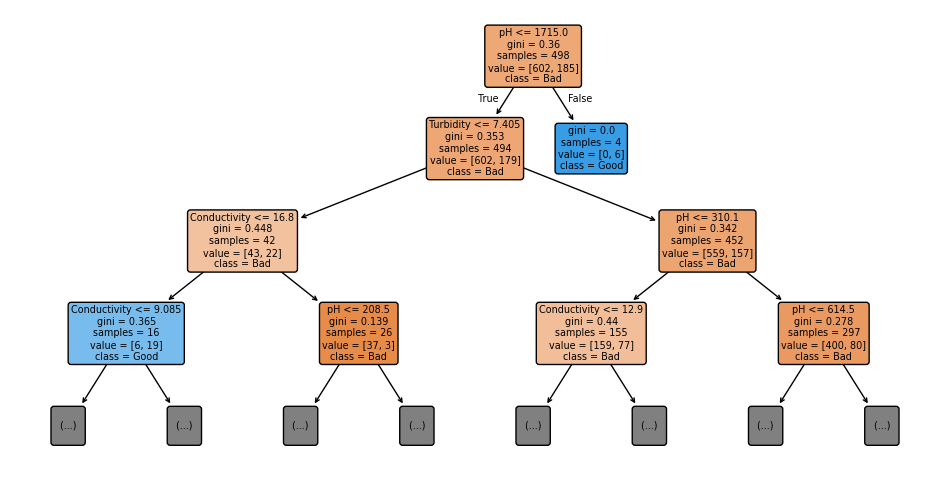

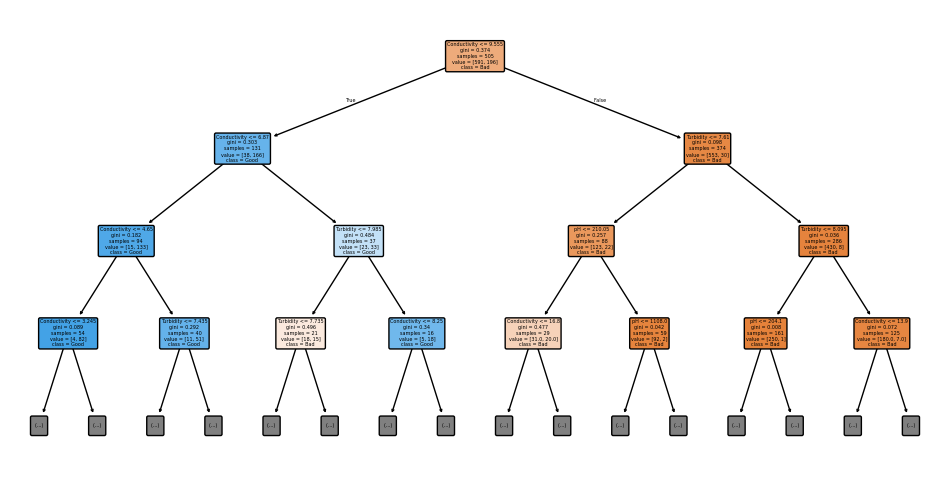

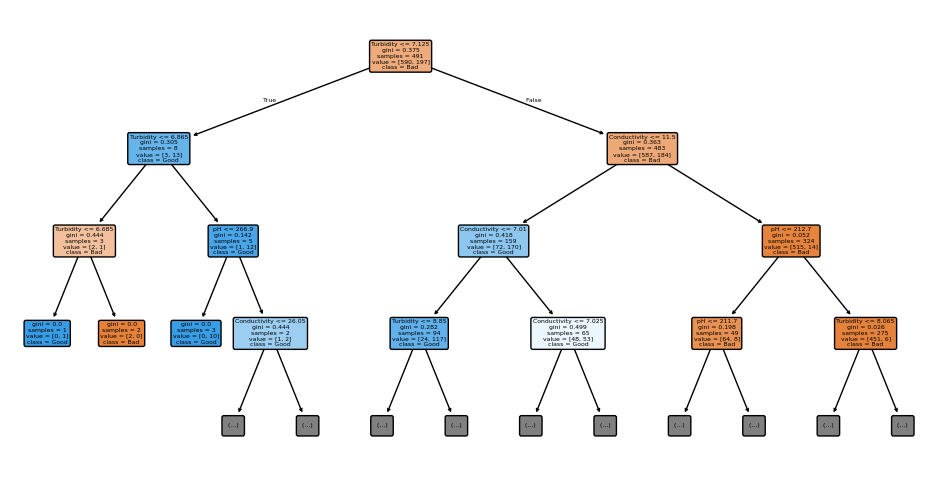

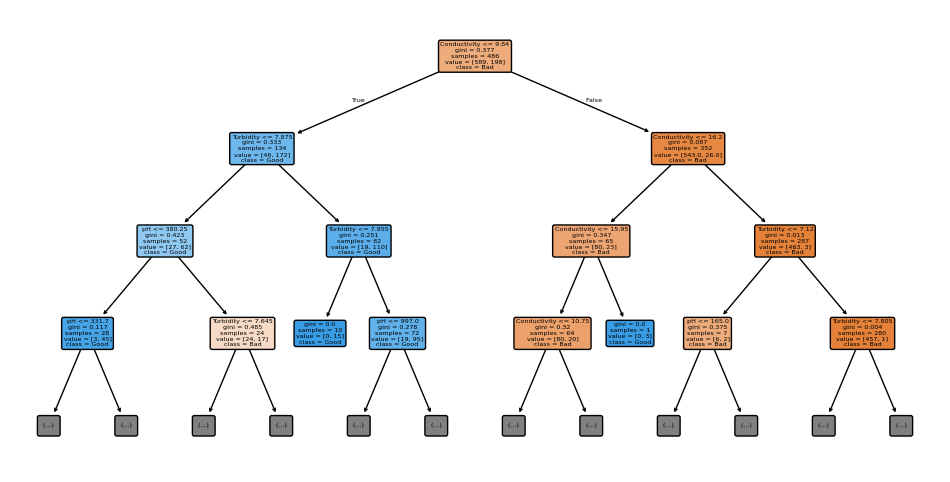

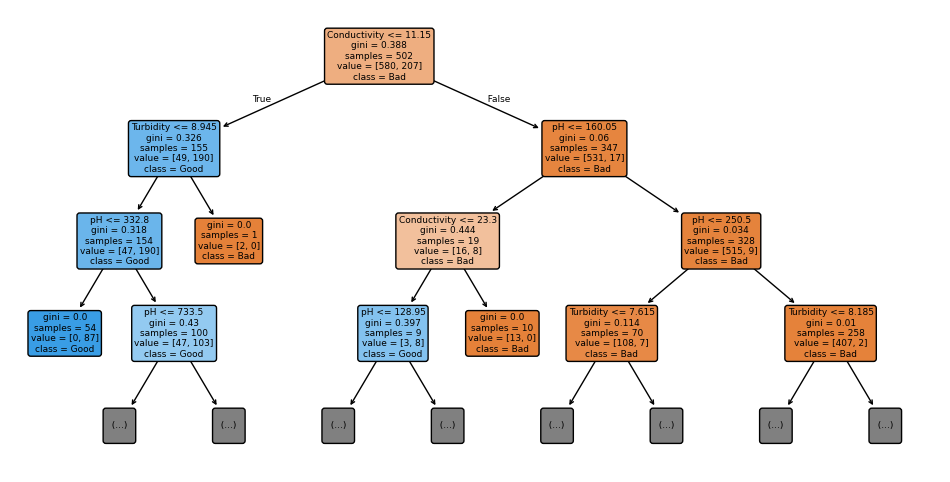

In [9]:
#display 5 trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

for i in range(5):

    plt.figure(figsize=(12, 6))
    plot_tree(model.estimators_[i],
              feature_names=['pH', 'Turbidity', 'Conductivity'],
              class_names=['Bad', 'Good'],
              filled=True,
              rounded=True,
              max_depth=3) #limit depth as the tree can be large
    
    plt.show()

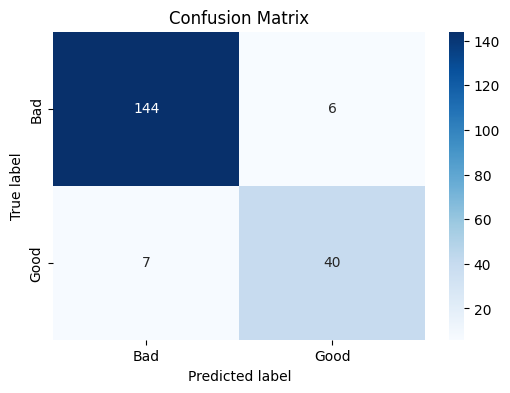

In [10]:
#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

#plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Bad', 'Good'],
            yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


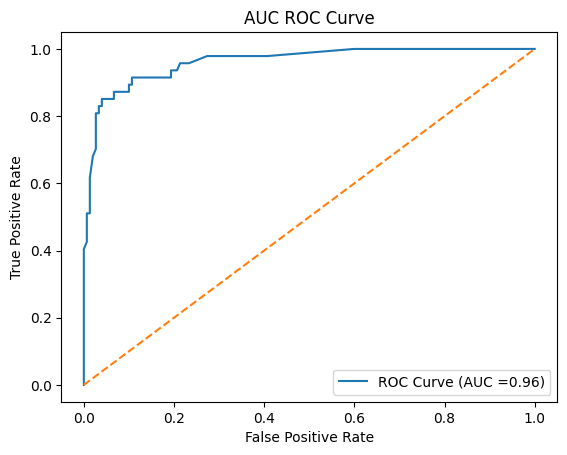

In [11]:
#AUC ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1] #probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plot
plt.plot(fpr, tpr, label=f"ROC Curve (AUC ={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--') # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve")
plt.legend()
plt.show()
                        

In [12]:
#find feature importance
features = ['pH', 'Turbidity', 'Conductivity']

importance = model.feature_importances_

#importance score
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance,
})

print(feature_df)

        Feature  Importance
0            pH    0.177308
1     Turbidity    0.124611
2  Conductivity    0.698081


In [13]:
#save model
import pickle 

filename = 'water_quality_random_forest_model.pickle'
with open(filename, 'wb') as f:
    pickle.dump(model, f)